# Networks Project


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random as rd
from collections import Counter
from scipy.optimize import curve_fit


C:\Users\George\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
#will dfine a list that wolds all the vertices
#a vertex is represented as the list which holds all its neighbours
#we can make an initian graph
g1 = []
e0 = [1,2] #will include the subcript 0 to be in concordance
#with python's list notation (which includes a zeroth entry in a list)
e1 = [0,1]
e2 = [0,2]
g1 = [e0,e1,e2]
print(g1)
#we can also save the nodes as a single number
n = 2
#this automatically means that we have nodes 0,1,2 (--> 3 nodes)
#we do not need a list to do this

#we also need a list to store the degree
d = [2,2,2]

[[1, 2], [0, 1], [0, 2]]


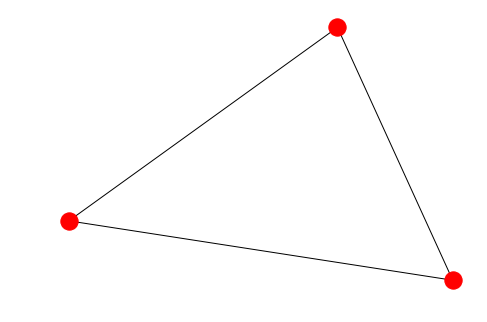

In [3]:
G=nx.Graph()
G.add_edges_from(g1)
nx.draw(G)
plt.show()

In [4]:
#I think I have decided how to grow my network
#it will be a list of edges
#then every time I need to visualise I can throw it in networks
#so..we can stat with g1 above and grow it using the BA algorythm

def step(edges,degree,t,m):
    """
    Take a tree with a set of edges and a degree distribution and grows it using the BA algorythm
    The set of edges is sufficiet to describe the tree but the degree distribution is kept for convinience
    (So that we don't have to count it from the edges every time)
    """
    t += 1

    for i in range(0,int(m/2)): 
        #pick random node
        node1,node2 = rd.choices(range(0,len(degree)),k=2,)
        degree[node1] += 1
        degree[node2] += 1
        newedge = [node1,node2] #len(degree) is also the number of the last vertex, node is counting the last node
        edges.append(newedge)   
       
    #add a new vertex   
    degree.append(int(m/2)) #this new vertex will have m/2 extra degrees   

    for i in range(0,int(m/2)): 
        #pick random edge
        e = rd.choice(edges)
        #pick random node from thsi edge
        node = rd.choice(e)
        degree[node] += 1
        newedge = [len(degree)-1,node] #len(degree) is also the number of the last vertex, node is counting the last node
        edges.append(newedge)   
        
    return edges,degree,t

In [114]:
#this is the same tree explained above just repeated here for convinience
g1 = []
e0 = [0,1] 
#e1 = [0,1]
#e2 = [0,2]
g1 = [e0]
d3 = [1,1]

[[0, 1], [0, 0], [1, 0], [2, 1], [2, 1], [1, 1], [0, 2], [3, 1], [3, 0], [3, 0], [0, 0], [4, 2], [4, 2], [1, 0], [3, 1], [5, 0], [5, 0]] [12, 9, 5, 4, 2, 2]


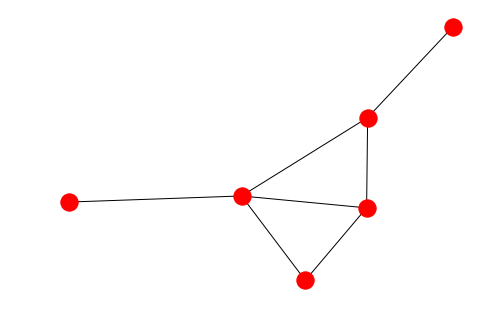

<Figure size 432x288 with 0 Axes>

In [118]:
t = 0
g1, d3, t1 = step(g1,d3,t,4)
print(g1,d3)
G=nx.Graph()
G.add_edges_from(g1)
nx.draw(G)

plt.show()
plt.savefig("Figures\\Network_Example.pdf")

In [5]:
#having aquired a degree distribution that seems right we can move on to log-binning the data and doing proper statistics
def logbin(data, scale = 1., zeros = False):
    """
    logbin(data, scale = 1., zeros = False)

    Log-bin frequency of unique integer values in data. Returns probabilities
    for each bin.

    Array, data, is a 1-d array containing full set of event sizes for a
    given process in no particular order. For instance, in the Oslo Model
    the array may contain the avalanche size recorded at each time step. For
    a complex network, the array may contain the degree of each node in the
    network. The logbin function finds the frequency of each unique value in
    the data array. The function then bins these frequencies in logarithmically
    increasing bin sizes controlled by the scale parameter.

    Minimum binsize is always 1. Bin edges are lowered to nearest integer. Bins
    are always unique, i.e. two different float bin edges corresponding to the
    same integer interval will not be included twice. Note, rounding to integer
    values results in noise at small event sizes.

    Parameters
    ----------

    data: array_like, 1 dimensional, non-negative integers
          Input array. (e.g. Raw avalanche size data in Oslo model.)

    scale: float, greater or equal to 1.
          Scale parameter controlling the growth of bin sizes.
          If scale = 1., function will return frequency of each unique integer
          value in data with no binning.

    zeros: boolean
          Set zeros = True if you want binning function to consider events of
          size 0.
          Note that output cannot be plotted on log-log scale if data contains
          zeros. If zeros = False, events of size 0 will be removed from data.

    Returns
    -------

    x: array_like, 1 dimensional
          Array of coordinates for bin centres calculated using geometric mean
          of bin edges. Bins with a count of 0 will not be returned.
    y: array_like, 1 dimensional
          Array of normalised frequency counts within each bin. Bins with a
          count of 0 will not be returned.
    """
    if scale < 1:
        raise ValueError('Function requires scale >= 1.')
    count = np.bincount(data)
    tot = np.sum(count)
    smax = np.max(data)
    if scale > 1:
        jmax = np.ceil(np.log(smax)/np.log(scale))
        if zeros:
            binedges = scale ** np.arange(jmax + 1)
            binedges[0] = 0
        else:
            binedges = scale ** np.arange(1,jmax + 1)
            # count = count[1:]
        binedges = np.unique(binedges.astype('uint64'))
        x = (binedges[:-1] * (binedges[1:]-1)) ** 0.5
        y = np.zeros_like(x)
        count = count.astype('float')
        for i in range(len(y)):
            y[i] = np.sum(count[binedges[i]:binedges[i+1]]/(binedges[i+1] - binedges[i]))
            # print(binedges[i],binedges[i+1])
        # print(smax,jmax,binedges,x)
        # print(x,y)
    else:
        x = np.nonzero(count)[0]
        y = count[count != 0].astype('float')
        if zeros != True and x[0] == 0:
            x = x[1:]
            y = y[1:]
    y /= tot
    x = x[y!=0]
    y = y[y!=0]
    return x,y

Article on scale-free networks and how to compare models to data:
https://www.nature.com/articles/s41467-019-08746-5#auth-2

In [6]:
#write a functio to automate:
def grow_a_net(T,m):
    g1 = []
    e0 = [0,1] 
    #e1 = [0,1]
    #e2 = [0,2]
    g1 = [e0]
    d = [1,1]
    for t in range(T):
            g1, d, t1 = step(g1,d,t,m)
            
    return g1,d,t1

In [8]:
%time g1, d, t1 = grow_a_net(1000000,2)

Wall time: 18.2 s


In [130]:
len(d)

10000002

In [30]:
#let's grow some nets!
d16 =[]
for i in range(10):
    %time g1, d, t1 = grow_a_net(99998,16)
    d16.append(d)

Wall time: 11 s
Wall time: 11.7 s
Wall time: 11 s
Wall time: 13 s
Wall time: 17.5 s
Wall time: 11.8 s
Wall time: 11.3 s
Wall time: 10.5 s
Wall time: 9.5 s
Wall time: 6.3 s


In [31]:
np.savetxt("N_5_m_16_evert.txt",d16)

In [70]:
#let's also define the functions for the theoretical predictions
def continuous(k,m=2,A=0.3):
    return A * (k) **((-5*k)/(k+2*m))

def continuous2(k,m=2,A=0.3):
    return ((5*m)**4/1) * (k+2*m) **(-5)

def discrete(k,m=2):     
    return (12*m*(3*m+3)*(3*m+2)*(3*m+1)) / ((k+2*m+4)*(k+2*m+3)*(k+2*m+2)*(k+2*m+1)*(k+2*m))

#def discrete(k,m=2):     
 #   return (12*m*(5*m+3)*(5*m+2)*(5*m+1)) / ((k+4*m+4)*(k+4*m+3)*(k+4*m+2)*(k+4*m+1)*(k+4*m))

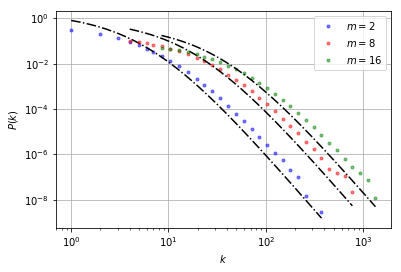

In [72]:
marker = "."
a = 0.5
s = 1.2

x,y = logbin(np.asarray(d2).flatten(),scale = s)
#plt.figure(figsize = (10,5))
plt.loglog(x,y,marker,color = "blue",label = "$m = 2$",
            alpha = a)
#get some space to plot
space = np.arange(x[0],x[-1],0.1)
plt.loglog(space,discrete(space,2),"-.", color = "black")

x,y = logbin(np.asarray(d8).flatten(),scale = s)
space = np.arange(x[0],x[-1],0.1)
plt.loglog(x,y,marker,color = "red",label = "$m = 8$",
            alpha = a)
plt.loglog(space,discrete(space,8),"-.", color = "black")

x,y = logbin(np.asarray(d16).flatten(),scale = s)
space = np.arange(x[0],x[-1],0.1)
plt.loglog(x,y,marker,color = "green",label = "$m = 16$",
            alpha = a)
plt.loglog(space,discrete(space,m=16),"-.", color = "black")

plt.grid()
plt.xlabel("$k$")
plt.ylabel("$P(k)$")
plt.legend(bbox_to_anchor = (1,1))
plt.savefig("Figures\\fixed_N_5_changing_m_vert_initial.pdf",bbox_inches='tight')

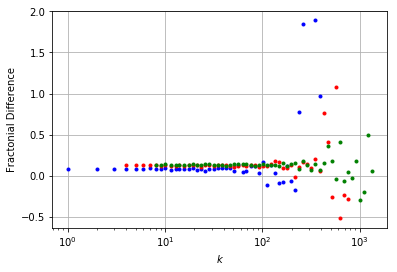

In [68]:
s = 1.1

x,y = logbin(np.asarray(d2).flatten(),scale = s)
plt.semilogx(x,(discrete(x,m=2)-y)/y,".", color = "blue", label = "$m = 2$")

x,y = logbin(np.asarray(d8).flatten(),scale = s)
plt.semilogx(x,(discrete(x,m=8)-y)/y,".", color = "red", label = "$m = 5$")

x,y = logbin(np.asarray(d16).flatten(),scale = s)
plt.semilogx(x,(discrete(x,m=16)-y)/y,".", color = "green", label = "$m = 20$")


#plt.ylim(-0.2,0.0)
#plt.legend(bbox_to_anchor = (1,1),fontsize = "large")
plt.grid()
plt.xlabel("$k$")
plt.ylabel("Fractonial Difference")
plt.savefig("fdifference_evert.pdf", bbox_inches = "tight")